# Q1. Housing Price Prediction

Dataset Description: The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block. 

The attributes in the dataset are as follows; their names are self-explanatory: 
     

    longitude (continuous): One of the coordinates that are used to identify the California district block 
     

    latitude (continuous): One of the coordinates that are used to identify the California district block 
     

    housing_median_age (continuous): Average age of the house in California district block 
     

    total_rooms (continuous): Total number of rooms of all the houses in the California district block 
     

    total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block 
     

    population (continuous): Number of people residing in the district block 
     

    households (continuous): Number of families in the district block 
     

    median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars)  
     

    ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc.  
     

    median_house_value.(continuous): Median house value within a district block (measured in US Dollars)

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value. 

## Import Libraries
Import all necessary libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
RANDOM_SEED = 43    

### b. Data Loading / Preprocessing

#### i. Loading

1. Load the California housing dataset using `pandas.read_csv()` function and store it in the variable (i.e., a pandas dataframe) named `df’.

2. The resulting data frame should have the shape (20942, 10) indicating that there are 20942 rows and 10 columns.

In [ ]:
df = pd.read_csv('D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q1\housingmod.csv')
df.shape
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,40,2127,435.0,1166,409,1.2,500000,NEAR BAY
1,-122.23,37.88,45,2127,435.0,1166,409,0.8,450000,NEAR BAY
2,-124.10,40.73,29,2127,435.0,1166,409,0.4,800000,NEAR OCEAN
3,-124.17,40.74,29,2127,435.0,1166,409,1.2,1000000,NEAR OCEAN
4,-124.05,40.59,29,2127,435.0,1166,409,0.3,900000,<1H OCEAN


In [39]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20937,-124.17,40.74,29,2127,435.0,1166,409,1.2,1000000,NEAR OCEAN
20938,-124.05,40.59,29,2127,435.0,1166,409,0.3,900000,<1H OCEAN
20939,-117.65,35.00,29,2127,435.0,1166,409,2.0,100000,INLAND
20940,-117.65,35.00,29,2127,435.0,1166,409,6.0,50000,INLAND
20941,-117.65,35.00,29,2127,435.0,1166,409,7.0,99000,INLAND


3. Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using `pandas.DataFrame.dropna()` function. The resulting data frame should have the shape (20735, 10) indicating that there are 20735 rows and 10 columns.

In [52]:
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,40,2127,435.0,1166,409,1.2,500000,NEAR BAY
1,-122.23,37.88,45,2127,435.0,1166,409,0.8,450000,NEAR BAY
2,-124.10,40.73,29,2127,435.0,1166,409,0.4,800000,NEAR OCEAN
3,-124.17,40.74,29,2127,435.0,1166,409,1.2,1000000,NEAR OCEAN
4,-124.05,40.59,29,2127,435.0,1166,409,0.3,900000,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20937,-124.17,40.74,29,2127,435.0,1166,409,1.2,1000000,NEAR OCEAN
20938,-124.05,40.59,29,2127,435.0,1166,409,0.3,900000,<1H OCEAN
20939,-117.65,35.00,29,2127,435.0,1166,409,2.0,100000,INLAND
20940,-117.65,35.00,29,2127,435.0,1166,409,6.0,50000,INLAND


4. Now plot a box plot for median house values to check for extreme values using df.boxplot() function 

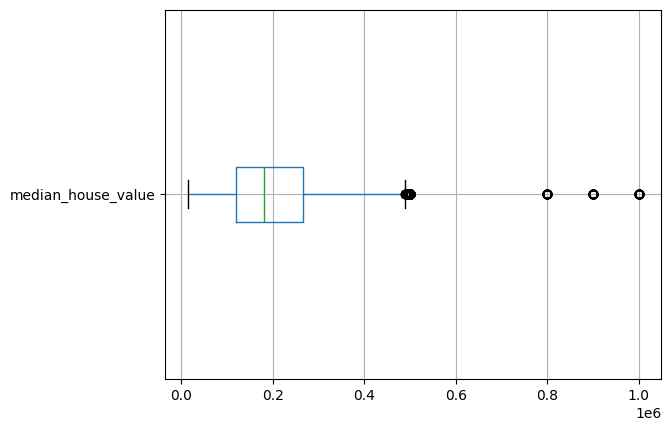

In [62]:
plt.show(df.boxplot('median_house_value',vert=False))

5.  Now filter the dataframe and remove all the values that are above 1.5iqr
You can find the iqr by subtracting the 75th and 25th quantile using the quantile function in pandas
You can then find the upper and lower limit by adding and subtracting 1.5*iqr to the 75th quantile and 25th quantile repectively

6. You should see that the new shape of the dataframe is (19557,10)

7. Create a data frame `corr_df` by dropping the columns latitude, longitude, and ocean_proximity using the `pandas.DataFrame.drop()` function. Use the Pearson correlation to find the correlation of each remaining feature in the `corr_df` with the target variable `median_house_value` using the function `pandas.DataFrame.corrwith()`. 

8. Create a data frame `X` of features (by dropping the column `median_house_value` from the original data frame) using the `pandas.DataFrame.drop()` function. Create a Series object of targets `Y` (by only considering the `median_house_value` column from the original data frame (Do NOT use the `corr_df` data frame in this step. Use the data frame which was obtained as a result of step 3 above). 

#### ii. Data Visualization

1. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

2. Use `pandas.dataframe.describe()` function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

3. Use `pandas.get_dummies` to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity 

#### iii. Data Splitting

1. Split data into training and test sets using the sklearn `train_test_split()` function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames `X_train, X_test, y_train, y_test`. (respectively, the training features, testing features, training targets and testing target).

#### iv. Data Scaling

1. Use the `StandardScaler()` to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values. 

2. For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in `X_train`, and `y_train` again

3. Scale the `X_test` and `y_test` as well and store the scaled values back in `X_test` and `y_test`. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`).  
Henceforth, `X_train, y_train, X_test, y_test` will refer to the scaled data unless stated otherwise.

4. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation of numerical attributes housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value for the `X_train` and `y_train` dataset (similar to step b.ii.1 above). Once again, plot each histogram as a separate subplot. 

### c. Modelling

#### i. Employ Linear Regression from sklearn.linear_model, and instantiate the model.

#### ii. Once instantiated, `fit()` the model using the scaled `X_train, y_train` data.

#### iii. Employ the `predict()` function to obtain predictions on `X_test`. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space). 

#### iv. Use `inverse_transform()` function to convert the normalized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

#### v. Perform PCA on the features (`X_train`) and set `n_component` as 2.

1. Show a scatter plot where on the x-axis we plot the first PCA component and second component on the y-axis.

2. Calculate the total percentage of variance captured by the 2 PCA components using `pca.explained_variance_ratio_`. Also, report the strength of each PCA component using `pca.singular_values_`.

### d. Evaluation

#### i. Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis

#### ii. Calculate MAPE, RMSE and R2 for the model and report them in the following table.

#### iii. To check how the model performs without removing the outliers, 
Read the dataframe again, and remove the missing values, scale it and retrain the model using sklearn and report the MAPE,RMSE and R2 in the format specified in evaluation #2